### MNIST 텐서플로우 실습
* 텐서플로우를 활용한 숫자 인식
----
1. 데이터의 형태를 확인한다
2. 동일사이즈인지 동일형태(정보량)인지
3. 데이터를 형태에 맞게 조작
---
### MNIST DATA
* 55000 train data
* 10000 test data
* 5000 validation data
* 28*28 =784byte image data

#####  라이브러리 불러오기
* Anaconda prompt 관리자 권한으로 실행
* pip install tensorflow==1.5.0

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Mnist data example 가져오기

In [160]:
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("c:/MnistData",one_hot=True)

Extracting c:/MnistData\train-images-idx3-ubyte.gz
Extracting c:/MnistData\train-labels-idx1-ubyte.gz
Extracting c:/MnistData\t10k-images-idx3-ubyte.gz
Extracting c:/MnistData\t10k-labels-idx1-ubyte.gz


#### 데이터 성격 확인하기

In [161]:
print('train data sahpe:',mnist.train.images.shape)
print('train label shape',mnist.train.labels.shape)
#print(mnist.train.images[0])
print(mnist.train.labels[0])


train data sahpe: (55000, 784)
train label shape (55000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


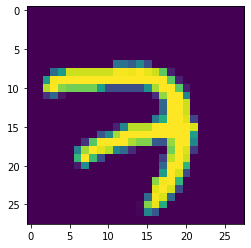

In [162]:
data1=mnist.train.images[0]
imagedata1=data1.reshape([28,28])
plt.imshow(imagedata1)

#### 텐서플로우를 활용한 학습
* 데이터 설정(placeholder)
     - images 데이터 입력부: xdata
     - labels 데이터 입력부: ydata    

In [163]:
xdata=tf.placeholder(tf.float32,[None,784])
ydata=tf.placeholder(tf.float32,[None,10])


#### 모델 설정
* 변수 설정(Variable)
* label_data = weight * image_data + bias
* hidden layer 설정 앞 행갯수=뒷 열갯수 가중치 설정




In [164]:
arg1=784
arg2=64

W1= tf.Variable(tf.ones([784,arg1]))
b1= tf.Variable(tf.zeros([arg1]))

W2= tf.Variable(tf.ones([arg1,arg2]))
b2= tf.Variable(tf.zeros([arg2]))

W3= tf.Variable(tf.ones([arg2,10]))
b3= tf.Variable(tf.zeros([10]))


#### 레이어 형성
* dnn에서는 배니싱 현상(가중치 영향이 사라지는 문제)
* RELU 액티베이션 함수를 사용

In [165]:
m1=tf.matmul(xdata,W1)+b1
L1=tf.nn.relu(m1)

m2=tf.matmul(L1,W2)+b2
L2=tf.nn.relu(m2)

y_=tf.matmul(L2,W3)+b3
#y_=tf.nn.softmax(y)

#### 손실지정
* 크로스 엔트로피 사용 픽셀이 가지는 정보량 평균
* 크로스 엔트로피를 최소화 하는 가중치 학습
* 크로스 엔트로피 에러는 loss cost error 등으로 표시


In [166]:
cost=tf.nn.softmax_cross_entropy_with_logits_v2(labels=ydata,logits=y_)
cross_entropy=tf.reduce_mean(cost)

#### 옵티마이저 설정
* 옵티마이저 : GD, Adam 등...
* 트레이닝 단계 설정

In [167]:
lr=0.01 # 학습률 learning rate
#optimizer=tf.train.GradientDescentOptimizer(lr)
#다용도 사용 가능한 Adam
optimizer=tf.train.AdamOptimizer(lr)
train_step=optimizer.minimize(cross_entropy)

#### 세션 생성및 실행
* Variable 이 있으면 변수 초기화 실행


In [168]:
init = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [169]:
total=1000
tr_x=[]
tr_y=[]
for i in range(total):    
    batch_xs,batch_ys=mnist.train.next_batch(100)
    fd={xdata:batch_xs,ydata:batch_ys}
    sess.run(train_step,feed_dict=fd)
    #정확도 accuracy 테스트
    prediction=tf.equal(tf.argmax(ydata,1),tf.argmax(y_,1))
    acc=tf.reduce_mean(tf.cast(prediction,tf.float32))
    tfd={xdata:mnist.test.images,ydata:mnist.test.labels}
    output=sess.run(acc,feed_dict=tfd)
    tr_x.append(i)
    tr_y.append(output)
    if(i%10==0):
        print("step:",i,", acc:",output)


step: 0 , acc: 0.098
step: 10 , acc: 0.1009
step: 20 , acc: 0.1028
step: 30 , acc: 0.1009
step: 40 , acc: 0.0958
step: 50 , acc: 0.0974
step: 60 , acc: 0.0892
step: 70 , acc: 0.0958
step: 80 , acc: 0.1135
step: 90 , acc: 0.0974
step: 100 , acc: 0.101
step: 110 , acc: 0.0974
step: 120 , acc: 0.0892
step: 130 , acc: 0.0892
step: 140 , acc: 0.1009
step: 150 , acc: 0.1032
step: 160 , acc: 0.0982
step: 170 , acc: 0.0974
step: 180 , acc: 0.1009
step: 190 , acc: 0.0974
step: 200 , acc: 0.0892
step: 210 , acc: 0.1032
step: 220 , acc: 0.098
step: 230 , acc: 0.098
step: 240 , acc: 0.0958
step: 250 , acc: 0.1028
step: 260 , acc: 0.098
step: 270 , acc: 0.1028
step: 280 , acc: 0.0982
step: 290 , acc: 0.0974
step: 300 , acc: 0.101
step: 310 , acc: 0.0974
step: 320 , acc: 0.1032
step: 330 , acc: 0.1032
step: 340 , acc: 0.0958
step: 350 , acc: 0.1028
step: 360 , acc: 0.0974
step: 370 , acc: 0.1135
step: 380 , acc: 0.0958
step: 390 , acc: 0.0892
step: 400 , acc: 0.0892
step: 410 , acc: 0.0974
step: 420

#### 분석하기
* 학습률 분석
* 가중치 분석


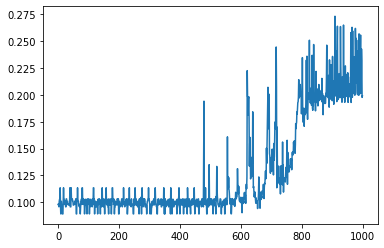

In [170]:
plt.plot(tr_x,tr_y)
plt.show()

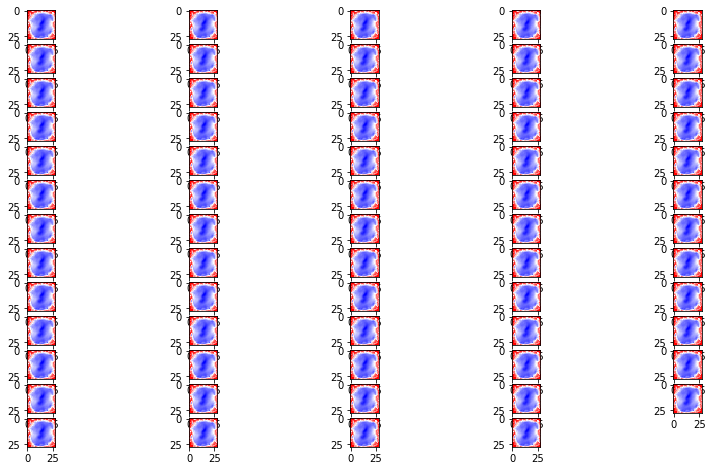

In [177]:
W1_=sess.run(W1) #[784,10]
b1_=sess.run(b1)
W1T_=W1_.T
plt.rcParams["figure.figsize"] = (14,100)
for i in range(arg2):
    w1_img=W1T_[i].reshape([28,28])
    plt.subplot(160,5,i+1)
    plt.imshow(w1_img,cmap='bwr')
plt.show()